In [1]:
# Created 14 Apr 23 - plots to add in Ch. 4 analysis ALL IS IN kWh
# To make plots & analysis of utilisation rate of S0 results (simulations)
# check python version (first part of this code to generate csv): 'ut_rate_S0.py'
# ^Code used to calculate values from csv (cumulative values of dumped energy, total 
# energy used and res supplied) of S0 and put it in the df format
# ^Csv created with above code: "Simu_res_S0_inst.csv" 
# this csv is the same I'm reimporting here to do plots and analysis 

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Move to path where csv are saved - OJO if need to rerun it then change path bc I moved csv! 
path = "/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Modelling PJua analysis/Results_outputs/Plots modelling PJua"

cwd = os.getcwd()
cwd

os.chdir(path)
cwd  #pwd

'/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/Project Jua/Modelling PJua analysis/Results_outputs/Plots modelling PJua'

In [2]:
S0_utilisation_rate = pd.read_csv("S0_utilisation_rate.csv")
S0_utilisation_rate.head()

,Site_name,County,Cumu_dumped_energy,Cumu_total_energy_used,Cumu_res_supplied,Ut_rate,Institution
0,AIC_Nadoto_Primary_School,Turkana,19577.066470,4674.983425,26031.138944,17.959197,School
1,AIC_Nayanaekaton_Primary_School,Turkana,20539.274711,3655.728370,26031.138944,14.043674,School
2,A_IC_Gangani_Primary_School,Kwale,17418.675728,6263.142375,25422.704409,24.636019,School
3,Abagarse_Primary_School,Isiolo,21313.220269,3321.507253,26508.275255,12.530077,School
4,Akadeli_Primary_School,Isiolo,17022.675103,7892.724448,26508.275255,29.774568,School


In [3]:
S0_utilisation_rate.tail().round(2)

,Site_name,County,Cumu_dumped_energy,Cumu_total_energy_used,Cumu_res_supplied,Ut_rate,Institution
161,Watala_Primary_School,Kilifi,19060.92,4677.16,25522.99,18.33,School
162,Werugha_Health_facility,Taita_Taveta,33638.95,21609.23,59132.19,36.54,Clinic
163,Yapha_Primary_School,Kwale,15377.50,8253.69,25422.70,32.47,School
164,Ziwani_Primary_School,Kilifi,20393.20,3293.64,25522.99,12.90,School
165,Ziyaradundo_Primary_School,Kwale,12889.97,10763.37,25422.70,42.34,School


In [4]:
S0_utilisation_rate.describe().round(2)
# df includes all 166 sites (schools & clinics combined)

,Cumu_dumped_energy,Cumu_total_energy_used,Cumu_res_supplied,Ut_rate
count,166.00,166.00,166.00,166.00
mean,19251.50,8047.89,29290.24,27.76
std,8175.80,4827.54,10114.71,15.33
min,1741.07,1204.78,25422.70,4.54
25%,15453.70,4675.53,25422.70,16.72
50%,17977.05,6721.63,25522.99,24.71
75%,20366.64,9615.16,26508.28,33.97
max,48761.27,22247.69,59643.62,87.36


In [5]:
import seaborn as sns

# Set style in Seaborn to plot
sns.set(rc={"figure.dpi":300})
sns.set_context("notebook")  # change to paper maybe? I prefer notebook style i think...
sns.set_style("ticks") # with axis ticks, no background lines

<AxesSubplot:xlabel='Ut_rate', ylabel='Count'>

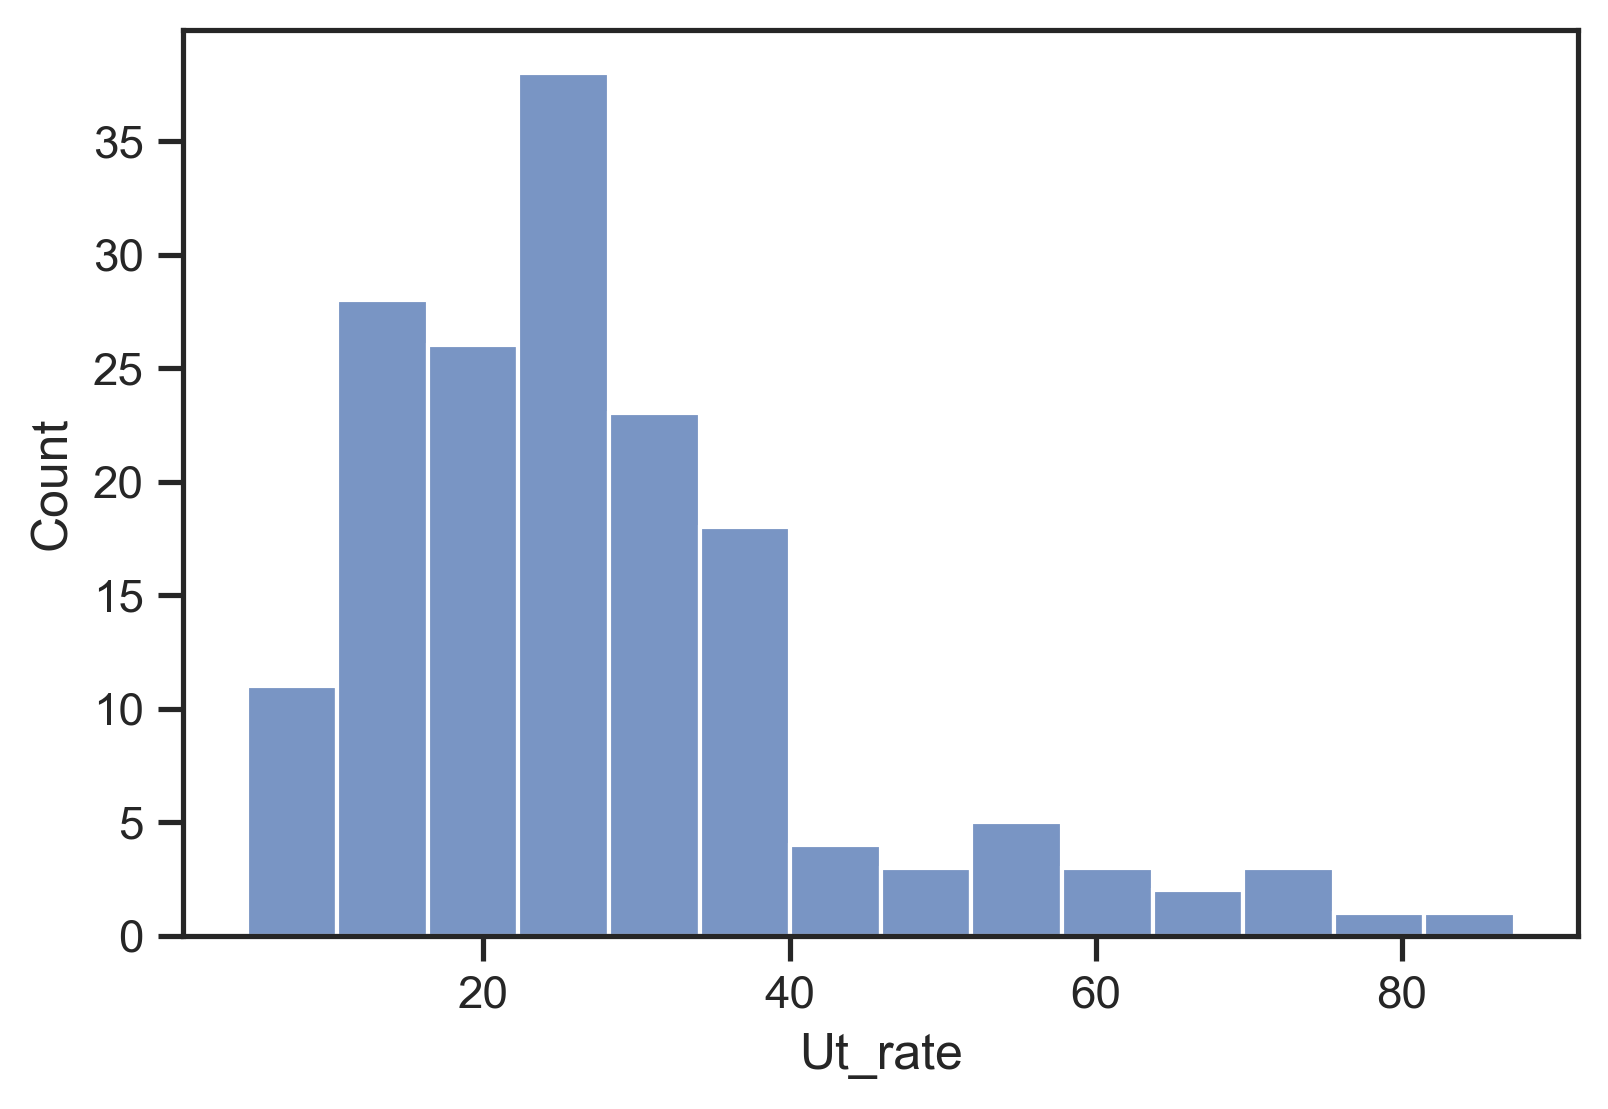

In [6]:
# Plot all sites together with default (as it is)
sns.histplot(data=S0_utilisation_rate, x="Ut_rate")

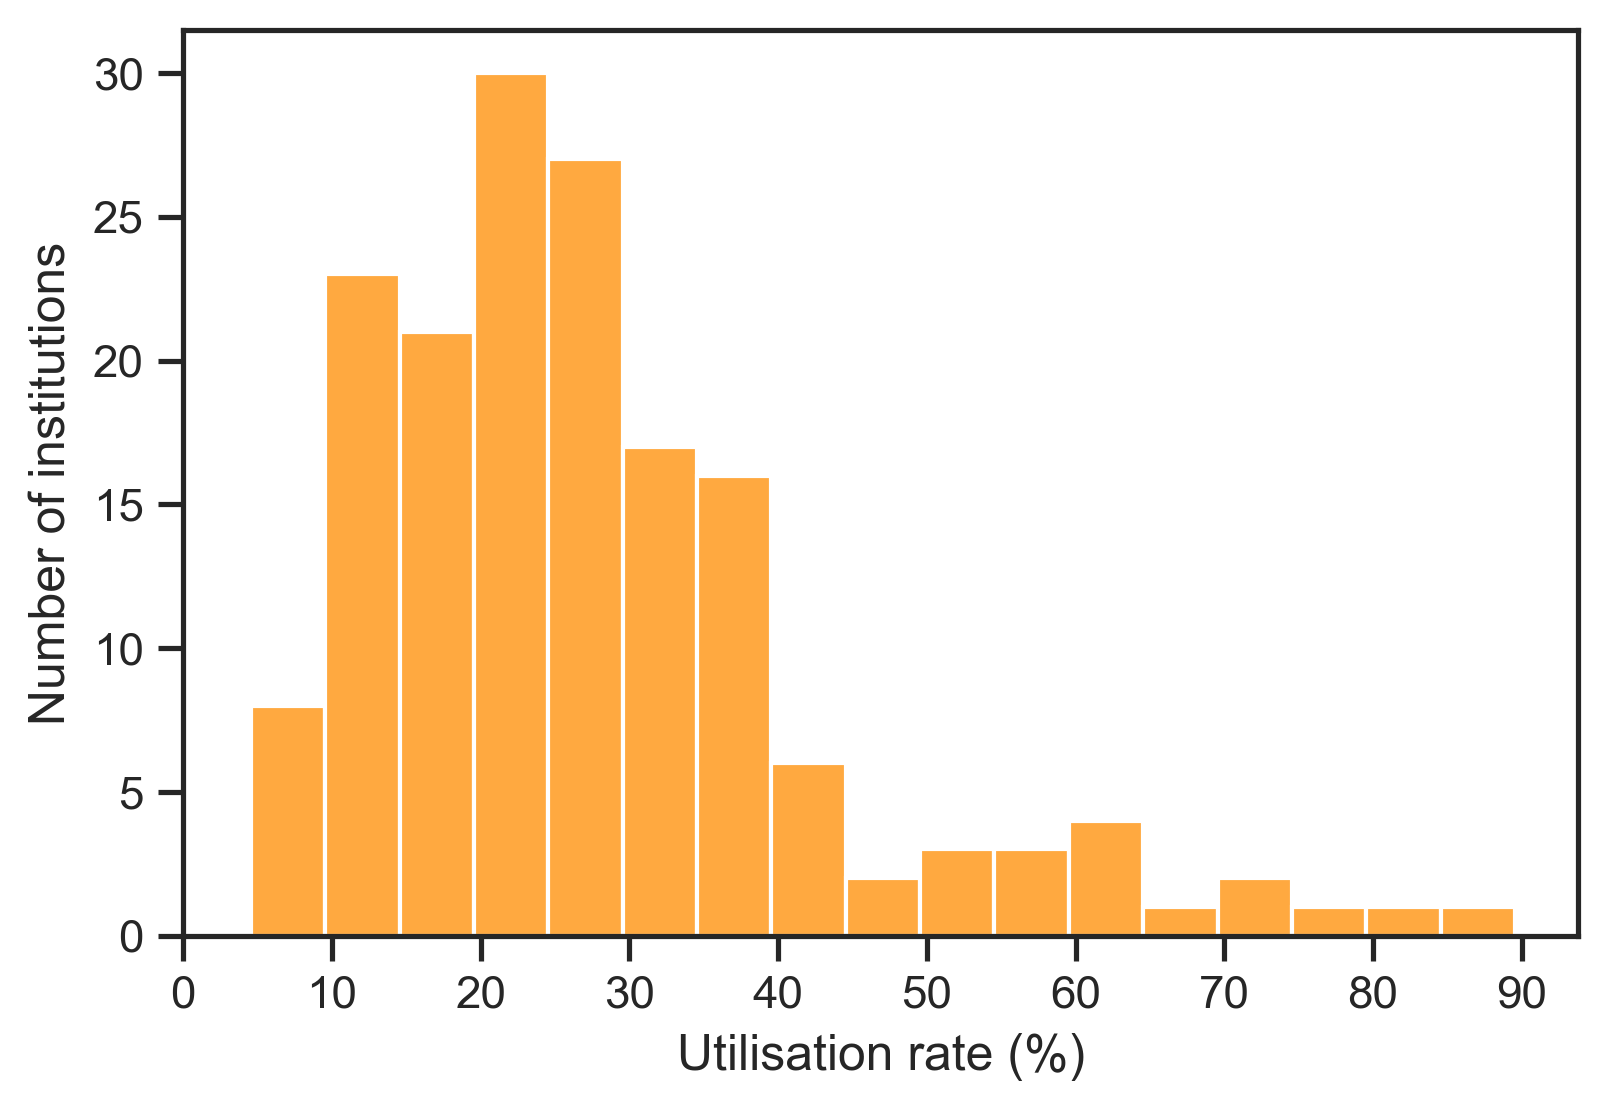

In [7]:
# Plot all sites (delete binwidth to get sns default)
ax = sns.histplot(data=S0_utilisation_rate, x="Ut_rate", color="darkorange", binwidth=5) # kde=True
ax.set_xticks(np.arange(0, 100, 10))  # looks better
ax.set(xlabel= "Utilisation rate (%)", ylabel= "Number of institutions")
# ax.set(title="All sites")
plt.show()

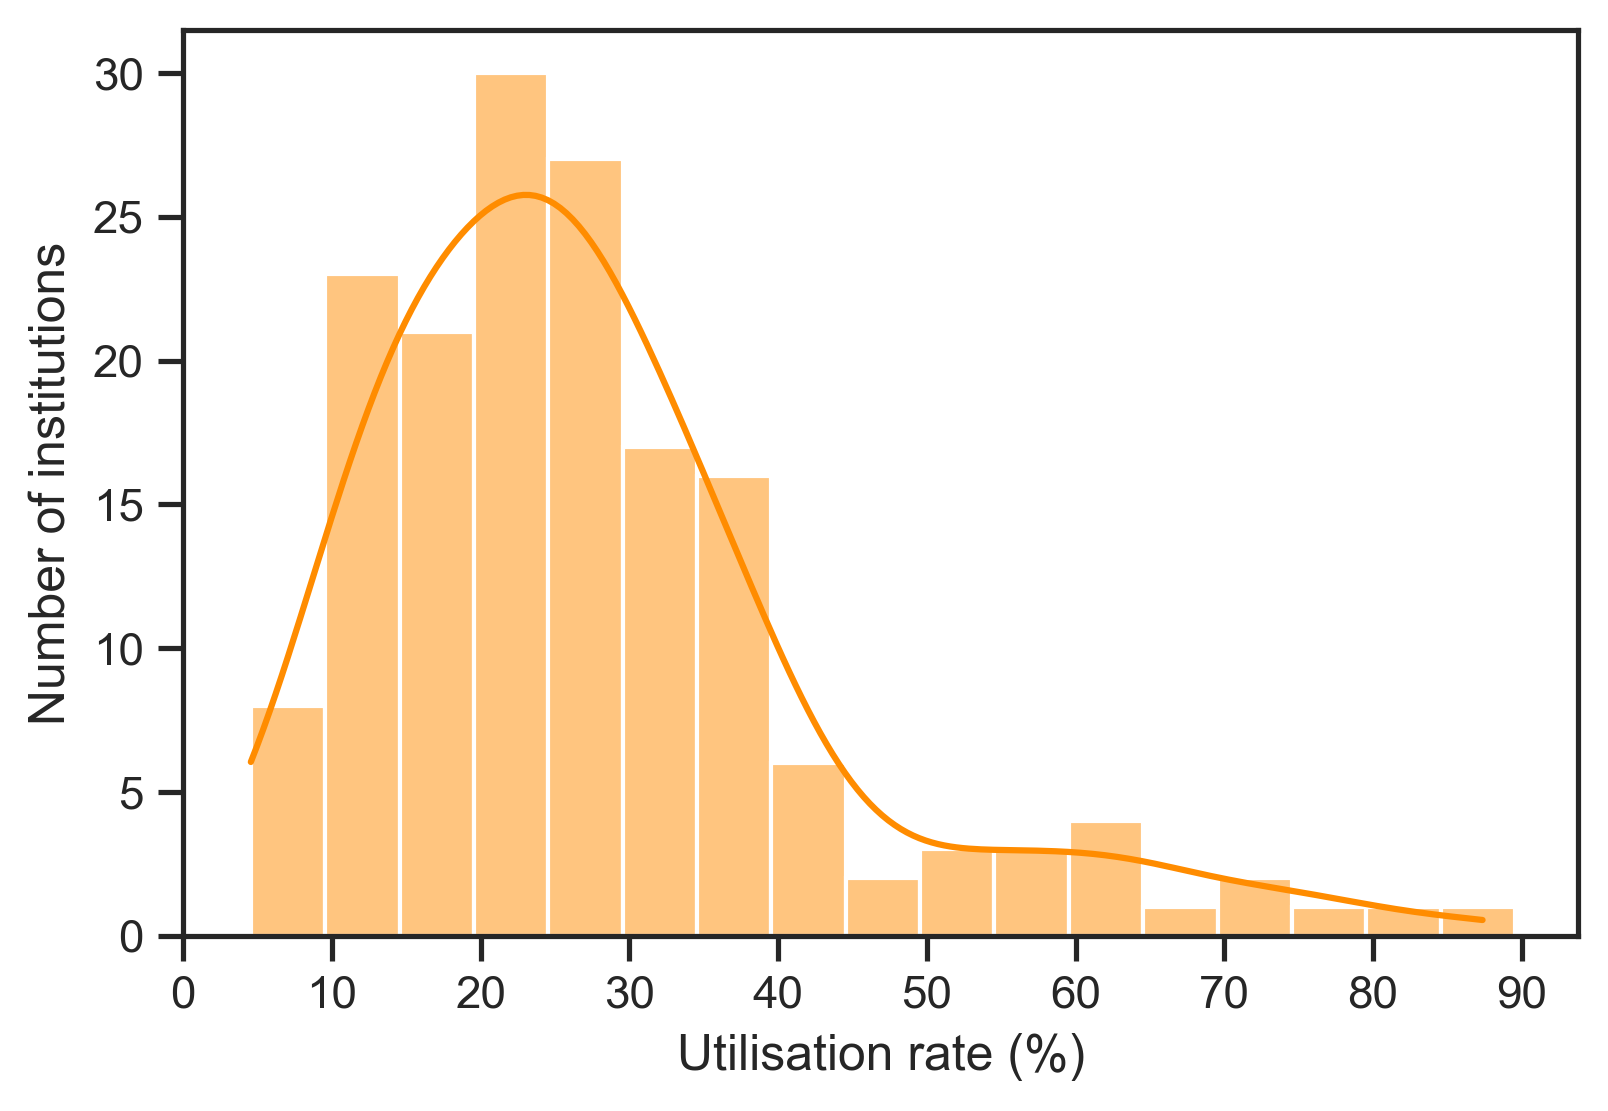

In [8]:
# As above but with kdeplot
ax = sns.histplot(data=S0_utilisation_rate, x="Ut_rate", color="darkorange", binwidth=5, kde=True) # 
ax.set_xticks(np.arange(0, 100, 10))  # looks better
ax.set(xlabel= "Utilisation rate (%)", ylabel= "Number of institutions")
# ax.set(title="All sites")
plt.show()

In [9]:
# Separate df by Institution type (Clinics) (when I reimport it to plot)
s0_utrate_clinics = S0_utilisation_rate[S0_utilisation_rate.Institution != 'School']
# returns df of only clinics (18)
s0_utrate_clinics.round(2)

,Site_name,County,Cumu_dumped_energy,Cumu_total_energy_used,Cumu_res_supplied,Ut_rate,Institution
13,Boyani_Dispensary,Kilifi,38460.47,15131.59,57426.73,26.35,Clinic
16,Busa_Dispensary,Kwale,39850.31,13435.96,57201.08,23.49,Clinic
18,Chingombero_Dispensary,Kwale,41406.17,12002.83,57201.08,20.98,Clinic
21,Dadacha_Basa_Dispensary,Isiolo,33678.12,22247.69,59643.62,37.30,Clinic
39,Isiolo_Samburu_Complex_Dispensary,Isiolo,42567.33,13072.08,59643.62,21.92,Clinic
54,Kavunyalo_Dispensary,Kilifi,33614.02,19962.36,57426.73,34.76,Clinic
78,Mabesheni_Dispensary,Kwale,35919.50,17447.80,57201.08,30.50,Clinic
86,Makamini_Dispensary,Kwale,46552.47,6614.11,57201.08,11.56,Clinic
98,Mazola_Dispensary,Kwale,44067.49,9107.79,57201.08,15.92,Clinic
102,Mbulia_Dispensary,Taita_Taveta,48761.27,6100.40,59132.19,10.32,Clinic


In [10]:
s0_utrate_clinics.describe().round(2)
# df includes only clinics

,Cumu_dumped_energy,Cumu_total_energy_used,Cumu_res_supplied,Ut_rate
count,18.00,18.00,18.00,18.00
mean,39361.05,14893.90,58166.32,25.60
std,4854.31,4987.62,1021.54,8.50
min,33088.04,6100.40,57201.08,10.32
25%,35501.99,12270.14,57201.08,21.22
50%,38690.29,15255.44,57426.73,26.57
75%,42277.04,19229.29,59132.19,32.77
max,48761.27,22247.69,59643.62,37.30


<AxesSubplot:xlabel='Ut_rate', ylabel='Count'>

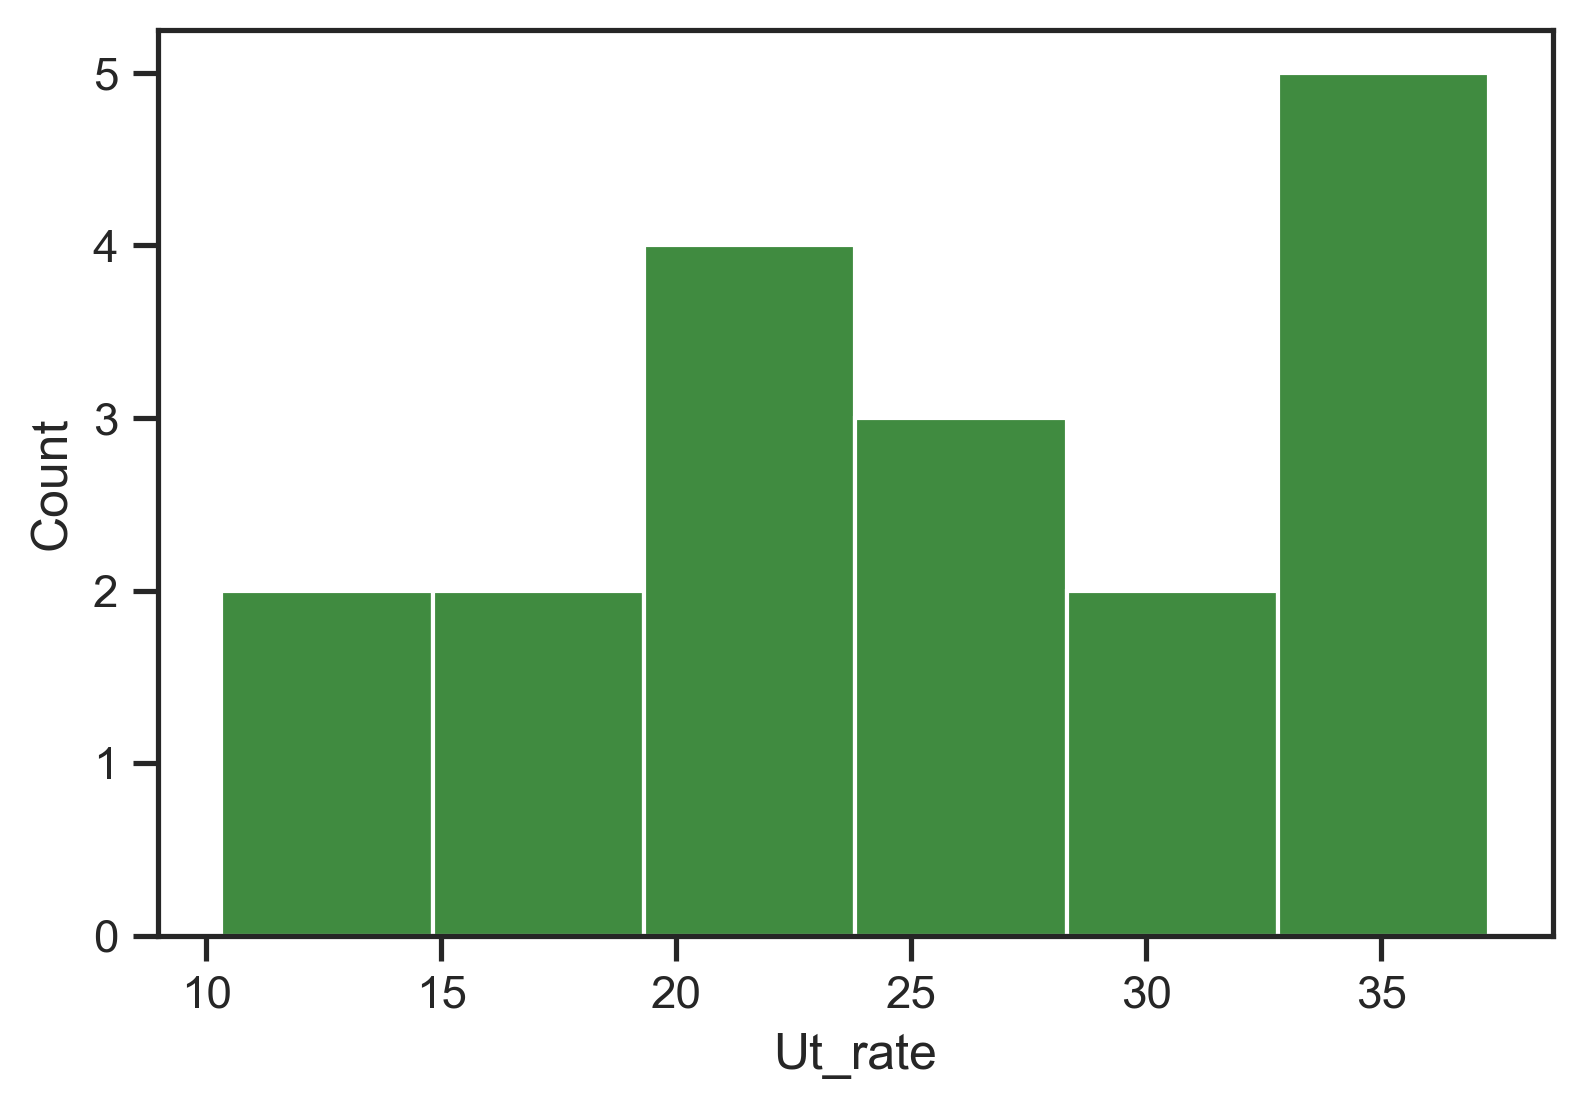

In [11]:
# Plot Clinics as it is (delete binwidth to get sns default - try with "forestgreen" too)
sns.histplot(data=s0_utrate_clinics, x="Ut_rate", color="darkgreen") #  binwidth=3

<AxesSubplot:xlabel='Ut_rate', ylabel='Count'>

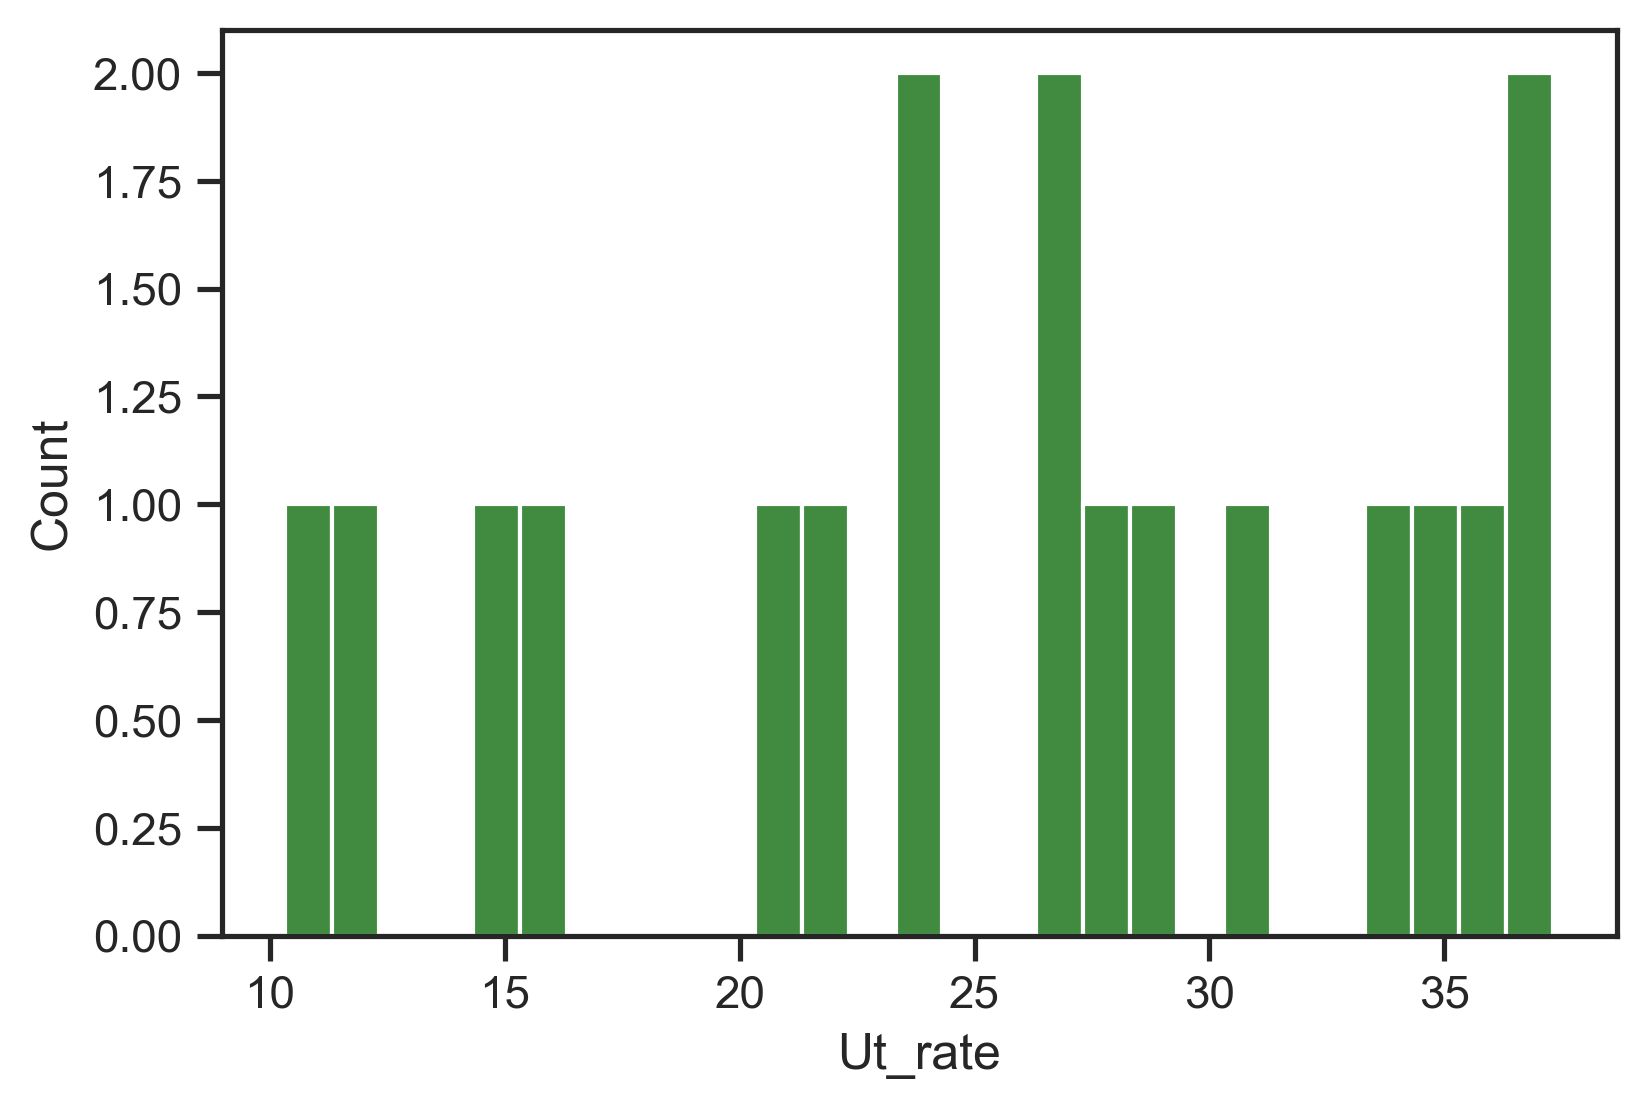

In [15]:
# As above but with smaller binwidth to better represent the data
sns.histplot(data=s0_utrate_clinics, x="Ut_rate", color="darkgreen", binwidth=1) #  

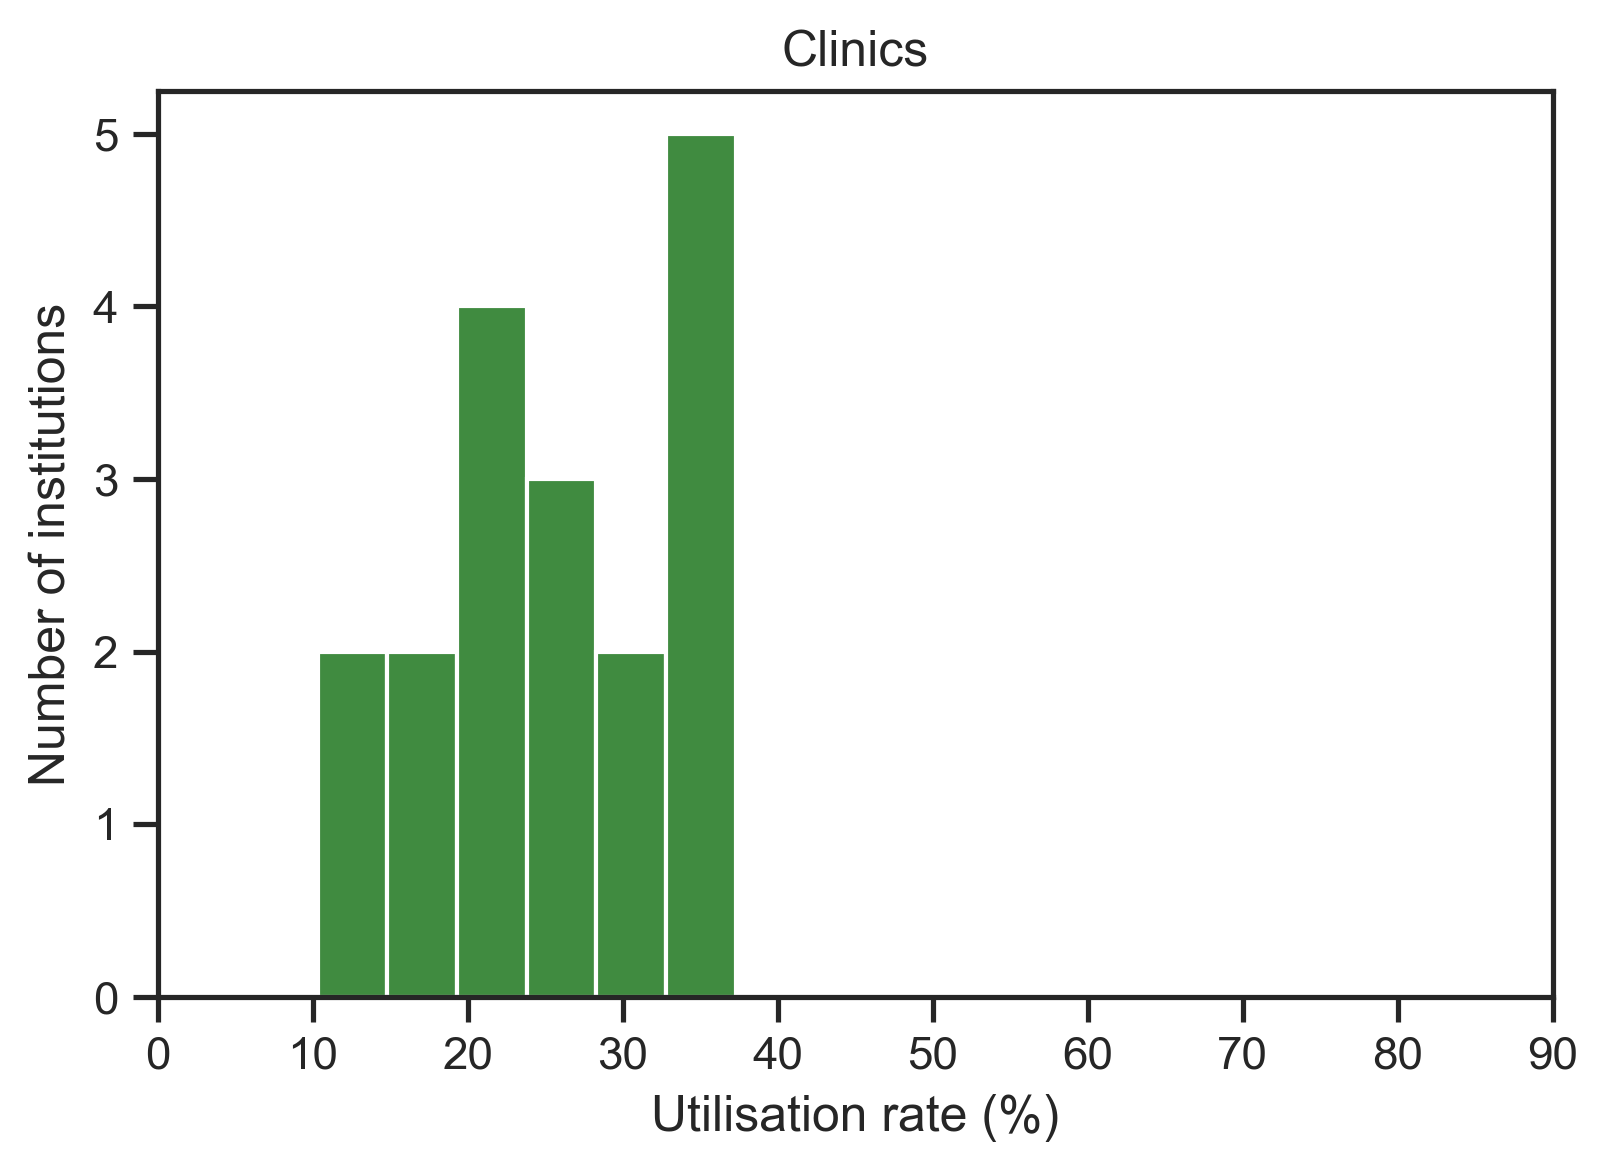

In [16]:
# Plot Clinics (try with "forestgreen" too)
ax=sns.histplot(data=s0_utrate_clinics, x="Ut_rate", color="darkgreen") # kde=True
ax.set_xticks(np.arange(0, 100, 10))  # looks better than extending axis to 100
ax.set(xlabel= "Utilisation rate (%)", ylabel= "Number of institutions")
ax.set(title="Clinics")
plt.show()

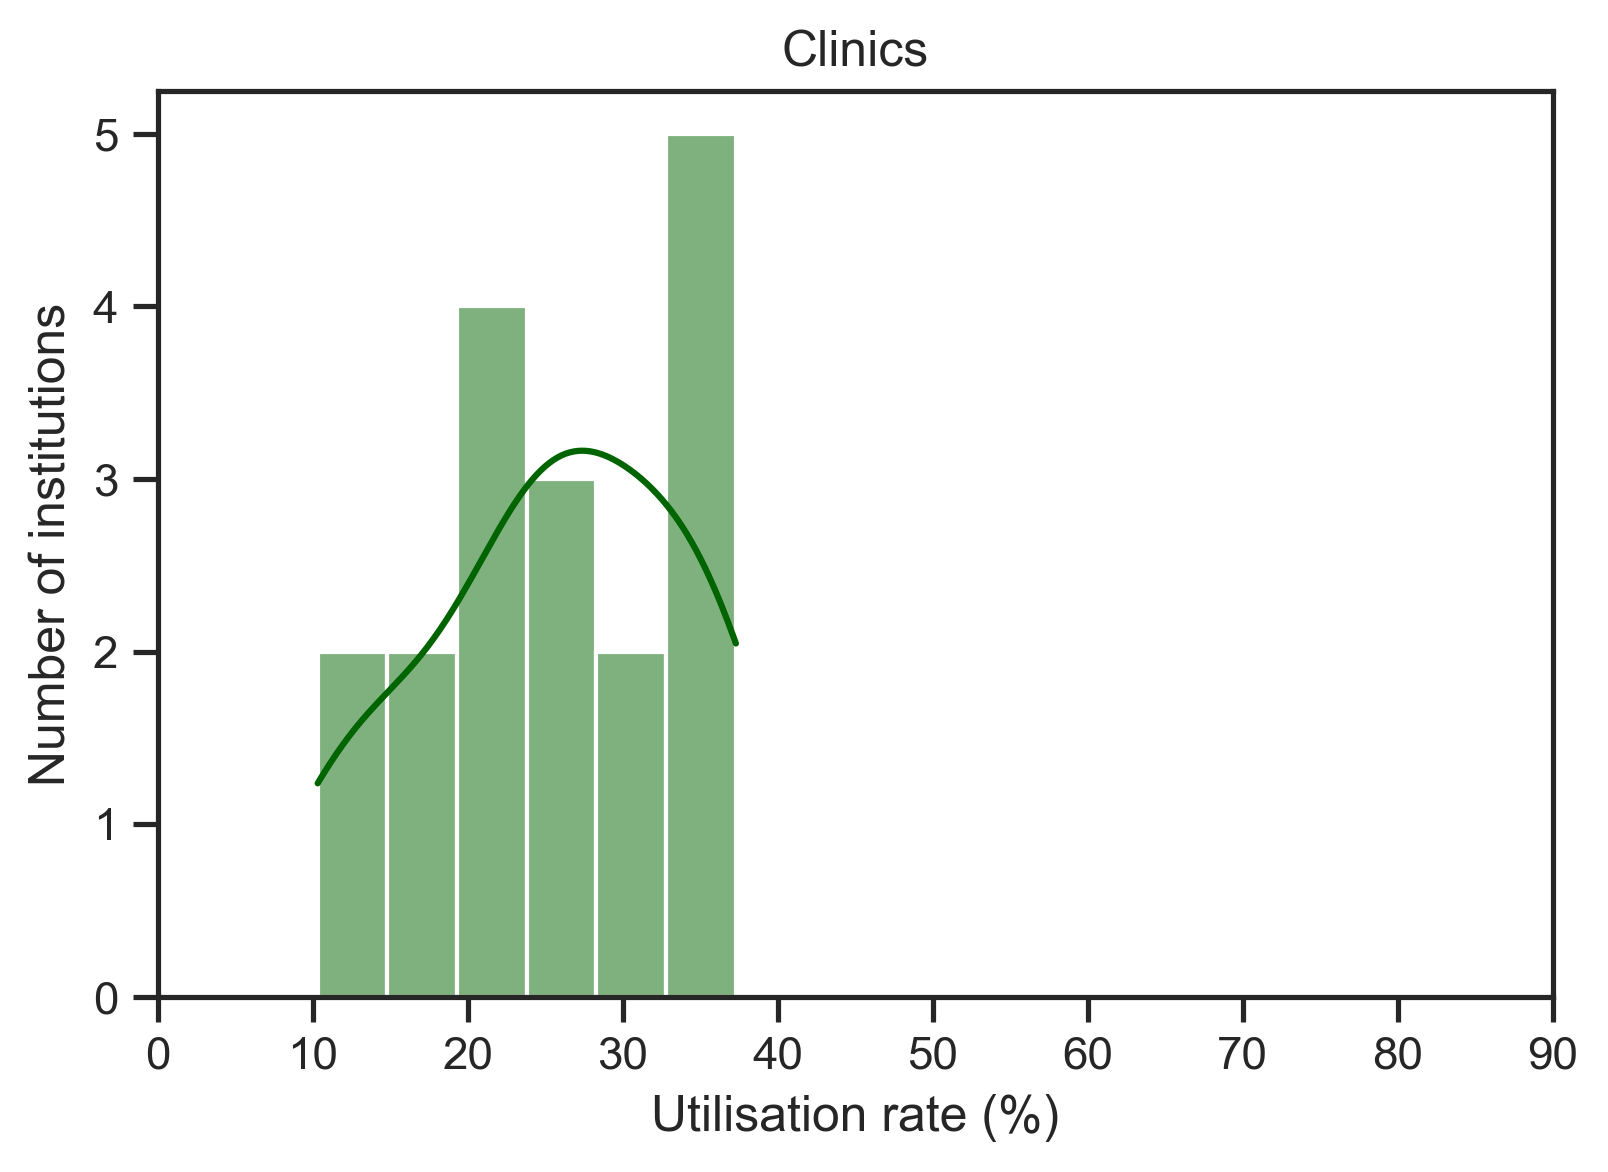

In [18]:
# As above but with kdeplot
ax=sns.histplot(data=s0_utrate_clinics, x="Ut_rate", color="darkgreen", kde=True) # 
ax.set_xticks(np.arange(0, 100, 10))  # looks better than extending axis to 100
ax.set(xlabel= "Utilisation rate (%)", ylabel= "Number of institutions")
ax.set(title="Clinics")
plt.show()

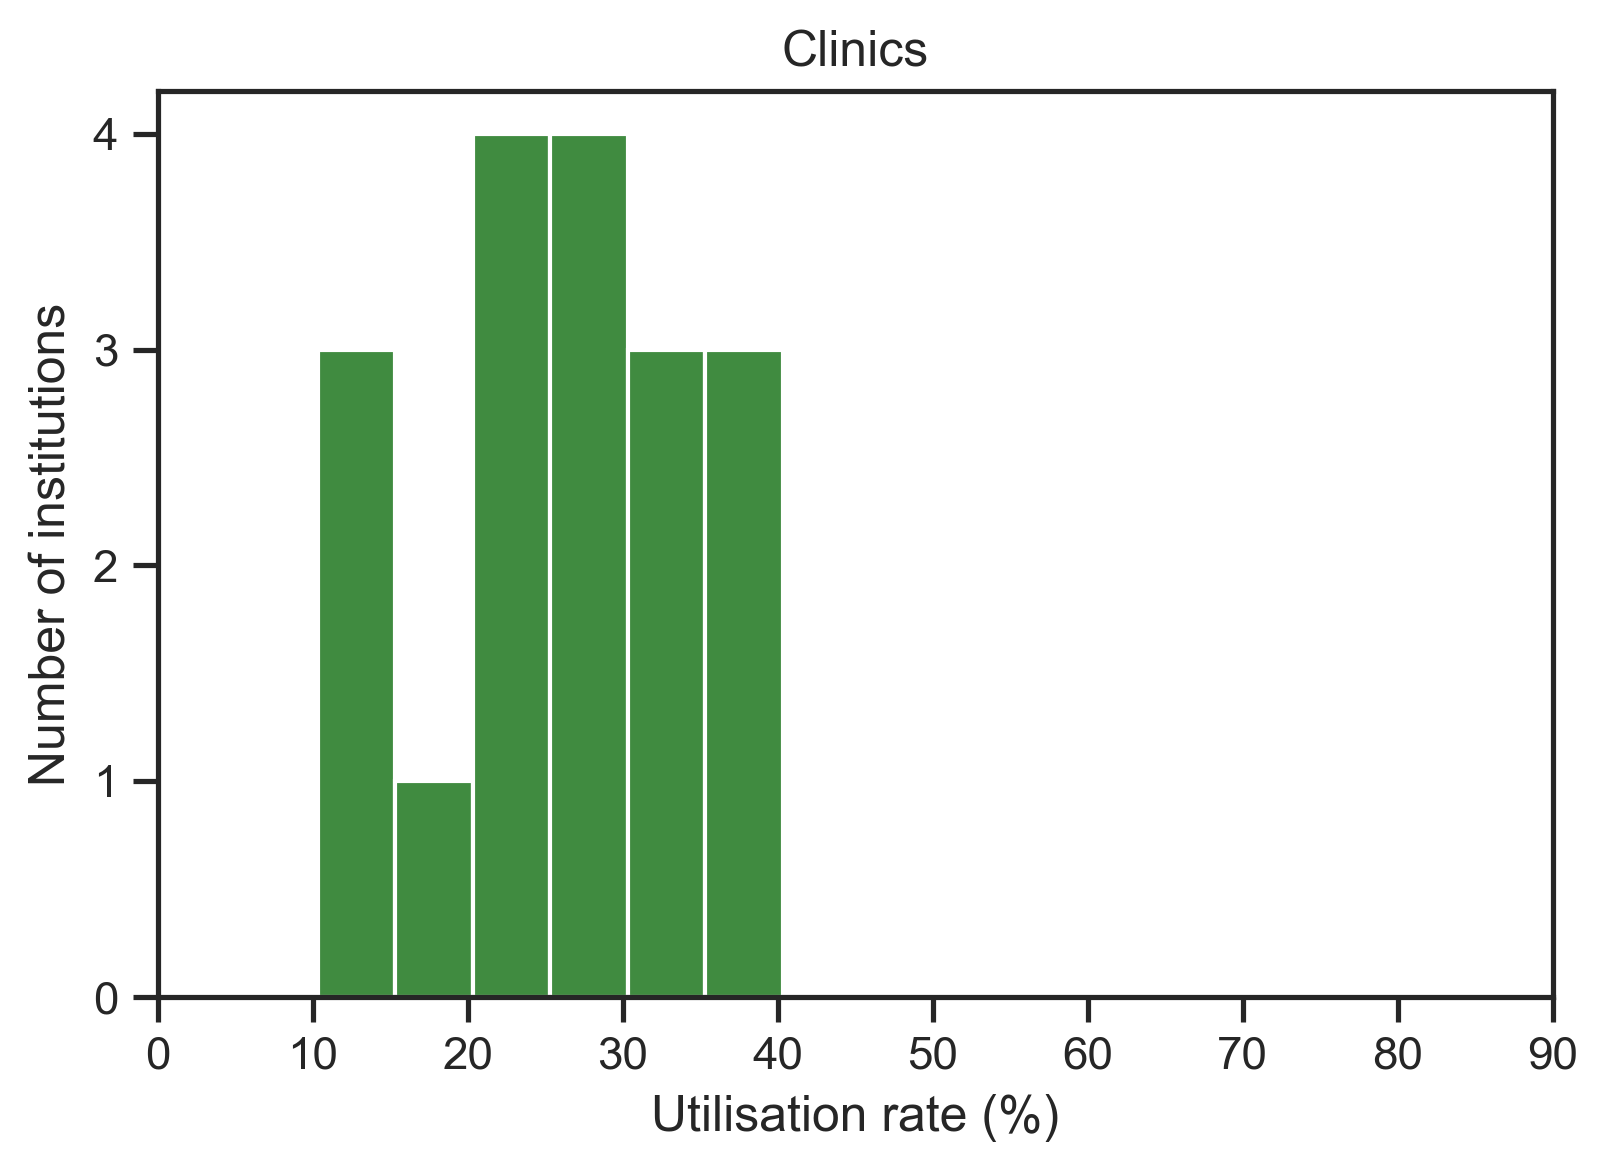

In [19]:
# As above but with binwidth=5 to be consistent with all sites plot
# THIS IS THE PLOT I'M USING IN PPT FOR NOW
ax=sns.histplot(data=s0_utrate_clinics, x="Ut_rate", color="darkgreen", binwidth=5) # kde=True
ax.set_xticks(np.arange(0, 100, 10))  # looks better than extending axis to 100
ax.set_yticks(np.arange(0, 5, 1))
ax.set(xlabel= "Utilisation rate (%)", ylabel= "Number of institutions")
ax.set(title="Clinics")
plt.show()

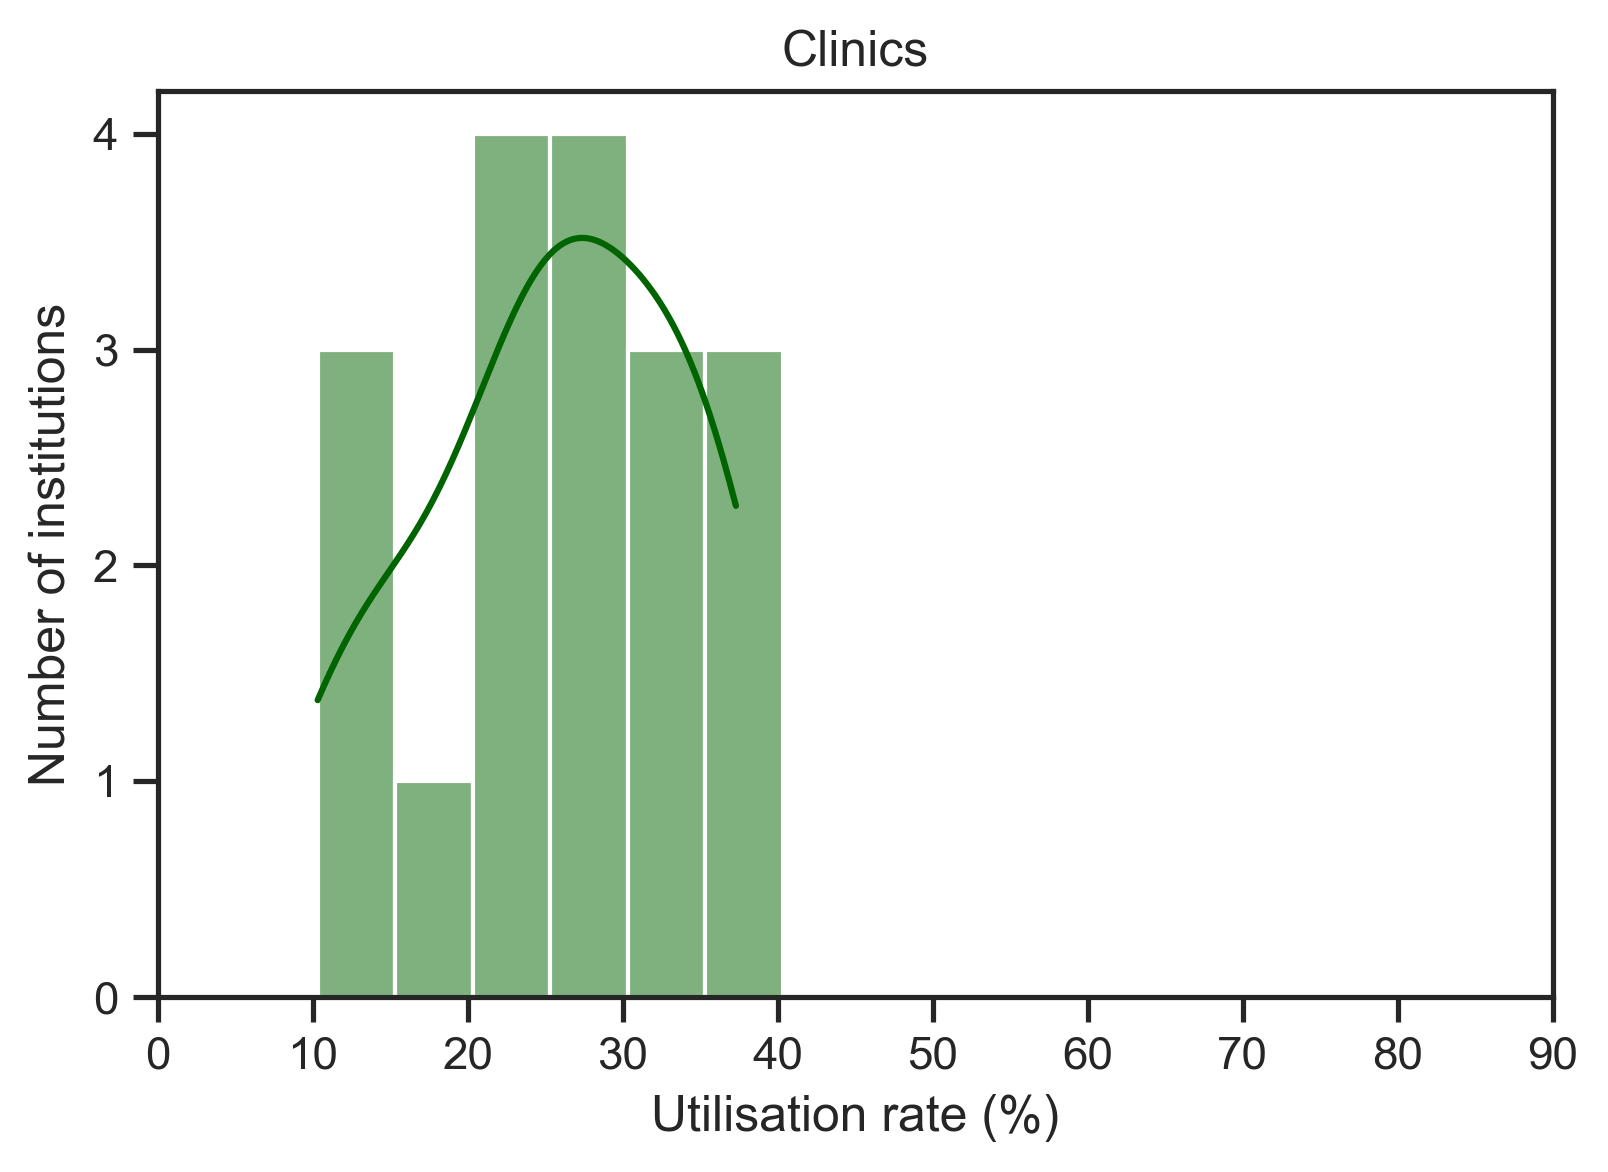

In [20]:
# As above but with kdeplot - THIS IS THE PLOT I'M USING IN PPT FOR NOW
ax=sns.histplot(data=s0_utrate_clinics, x="Ut_rate", color="darkgreen", binwidth=5, kde=True) # 
ax.set_xticks(np.arange(0, 100, 10))  # looks better than extending axis to 100
ax.set_yticks(np.arange(0, 5, 1))
ax.set(xlabel= "Utilisation rate (%)", ylabel= "Number of institutions")
ax.set(title="Clinics")
plt.show()

In [21]:
# Separate df by Institution type (Schools) (when I reimport it to plot)
s0_utrate_schools = S0_utilisation_rate[S0_utilisation_rate.Institution != 'Clinic']
# returns df of only schools (148)
s0_utrate_schools.round(2)

,Site_name,County,Cumu_dumped_energy,Cumu_total_energy_used,Cumu_res_supplied,Ut_rate,Institution
0,AIC_Nadoto_Primary_School,Turkana,19577.07,4674.98,26031.14,17.96,School
1,AIC_Nayanaekaton_Primary_School,Turkana,20539.27,3655.73,26031.14,14.04,School
2,A_IC_Gangani_Primary_School,Kwale,17418.68,6263.14,25422.70,24.64,School
3,Abagarse_Primary_School,Isiolo,21313.22,3321.51,26508.28,12.53,School
4,Akadeli_Primary_School,Isiolo,17022.68,7892.72,26508.28,29.77,School
...,...,...,...,...,...,...,...
160,Vithunguni_Primary_School,Kilifi,20130.55,3549.71,25522.99,13.91,School
161,Watala_Primary_School,Kilifi,19060.92,4677.16,25522.99,18.33,School
163,Yapha_Primary_School,Kwale,15377.50,8253.69,25422.70,32.47,School
164,Ziwani_Primary_School,Kilifi,20393.20,3293.64,25522.99,12.90,School


In [22]:
s0_utrate_schools.describe().round(2)
# df includes only schools

,Cumu_dumped_energy,Cumu_total_energy_used,Cumu_res_supplied,Ut_rate
count,148.00,148.00,148.00,148.00
mean,16805.75,7215.26,25778.29,28.02
std,4094.33,4104.27,441.47,15.96
min,1741.07,1204.78,25422.70,4.54
25%,15296.42,4394.83,25422.70,16.61
50%,17657.65,6299.73,25522.99,24.49
75%,19838.35,8740.05,26031.14,34.07
max,23347.13,22209.51,26508.28,87.36


<AxesSubplot:xlabel='Ut_rate', ylabel='Count'>

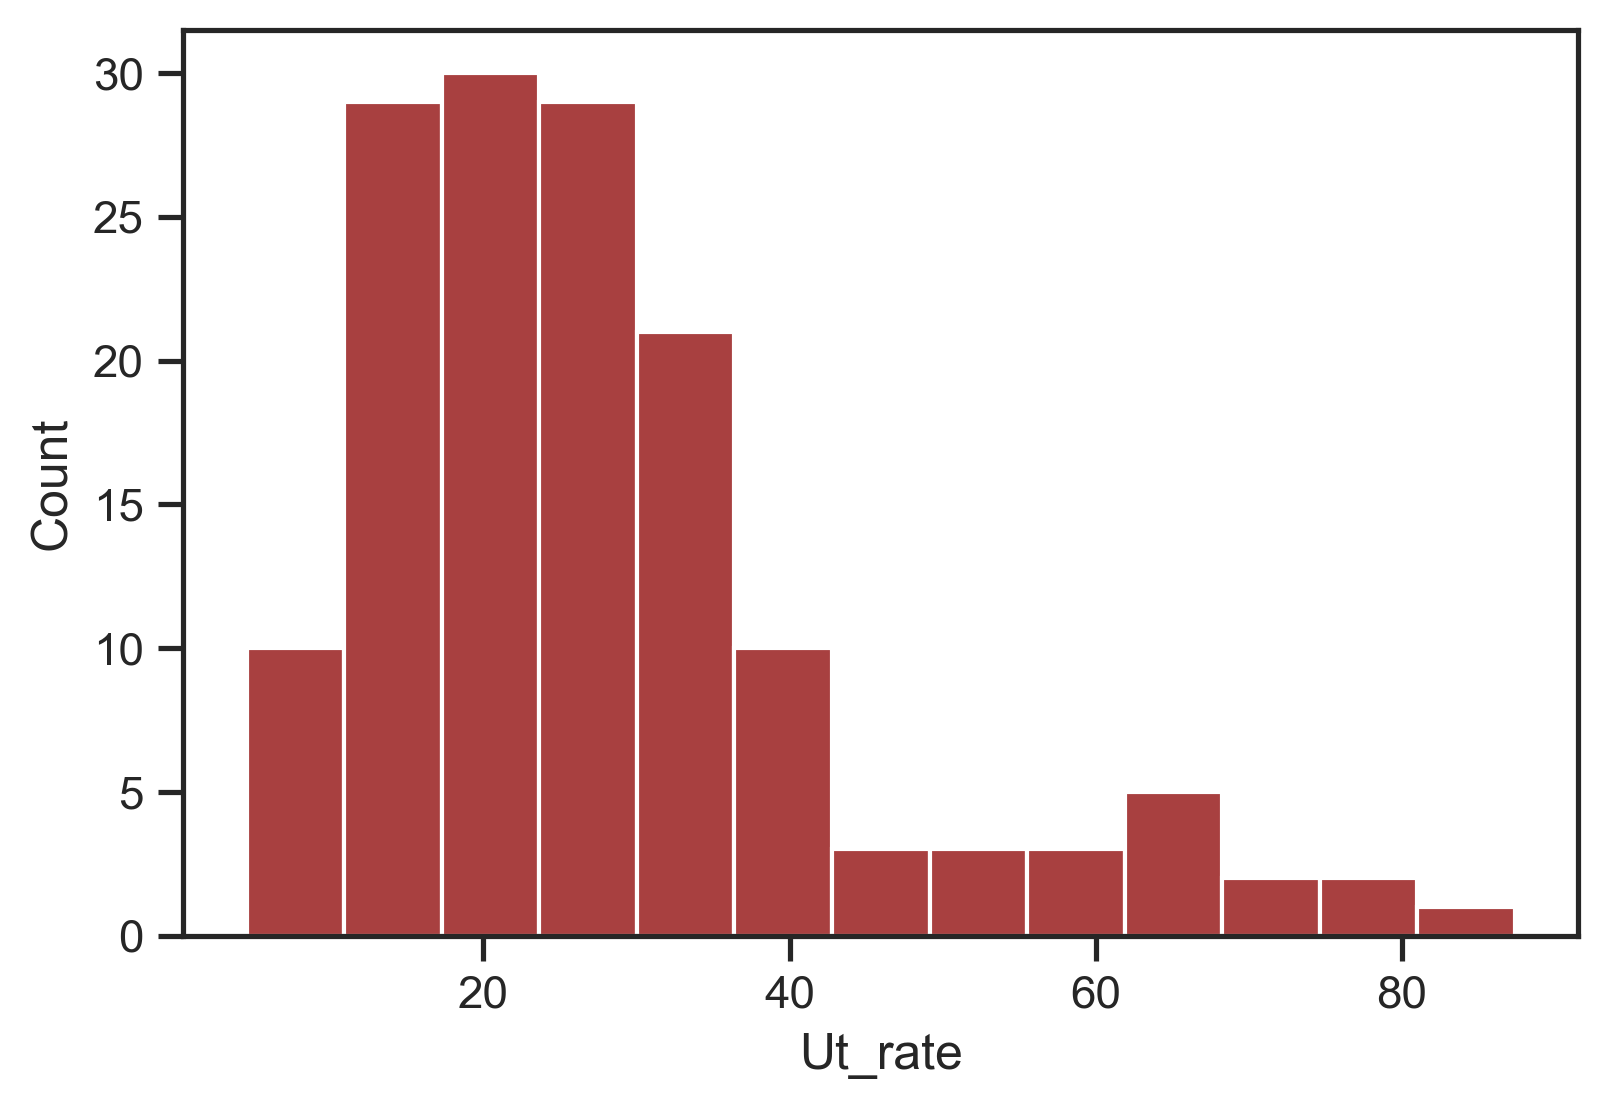

In [23]:
# Plot Schools as it is (delete binwidth to get sns default - try with "maroon" too)
sns.histplot(data=s0_utrate_schools, x="Ut_rate", color="darkred") # or binwidth= 3 or 5, kde=True

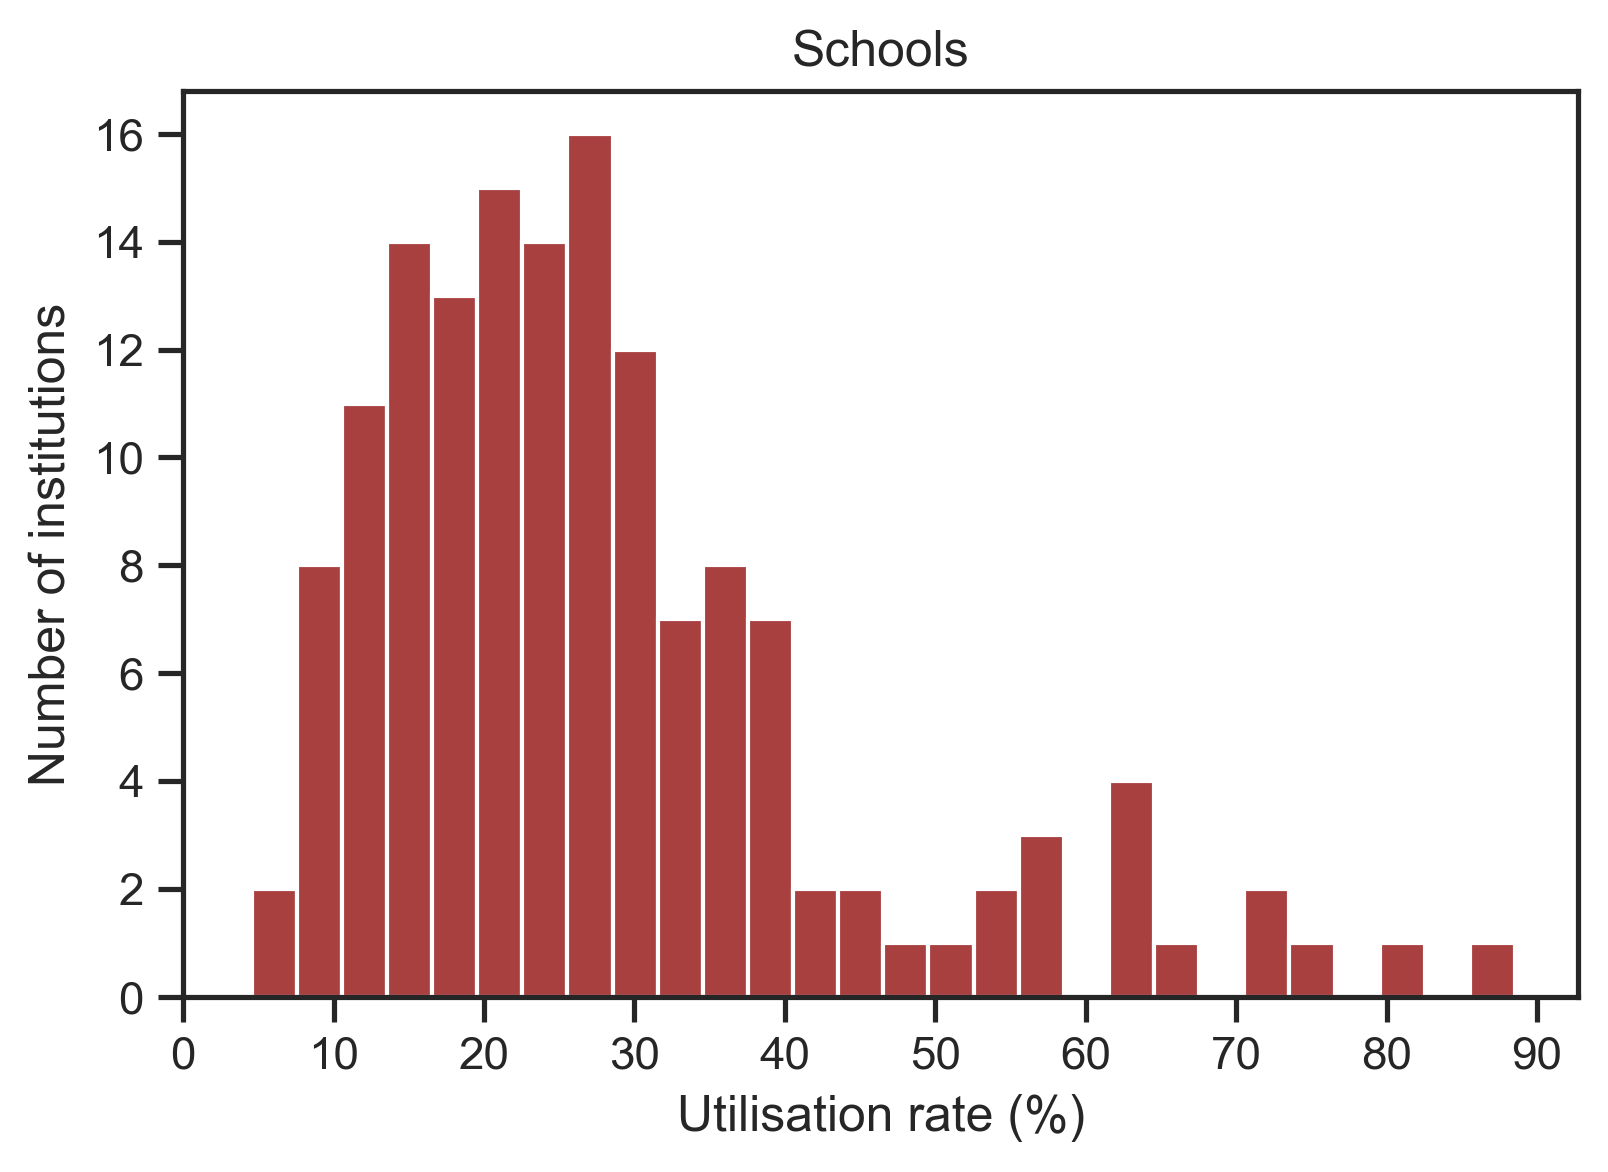

In [24]:
# Plot Schools (delete binwidth to get sns default)
ax=sns.histplot(data=s0_utrate_schools, x="Ut_rate", color="darkred", binwidth= 3) # kde=True
ax.set_xticks(np.arange(0, 100, 10))  # looks better
ax.set(xlabel= "Utilisation rate (%)", ylabel= "Number of institutions")
ax.set(title="Schools")
plt.show()

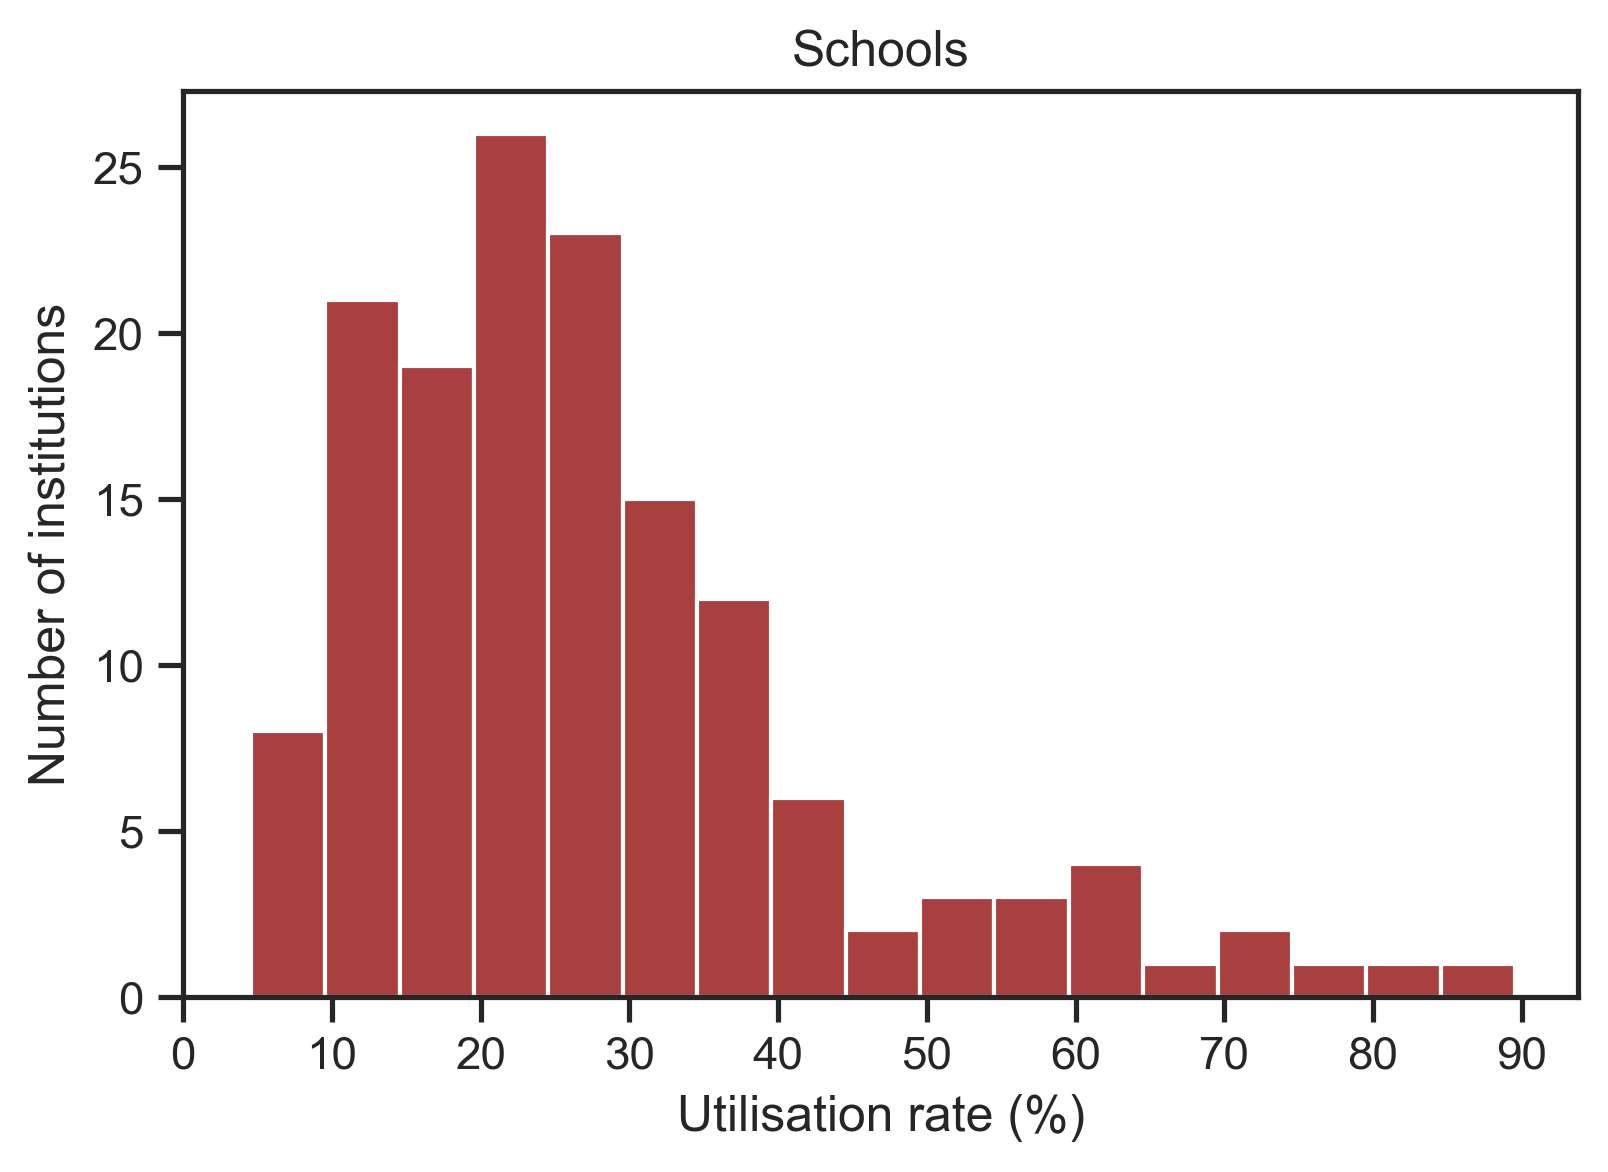

In [25]:
# Plot Schools (with binwidth=5 same as others)
# THIS IS THE PLOT I'M USING IN PPT FOR NOW
ax=sns.histplot(data=s0_utrate_schools, x="Ut_rate", color="darkred", binwidth=5) # kde=True
ax.set_xticks(np.arange(0, 100, 10))  # looks better
ax.set(xlabel= "Utilisation rate (%)", ylabel= "Number of institutions")
ax.set(title="Schools")
plt.show()

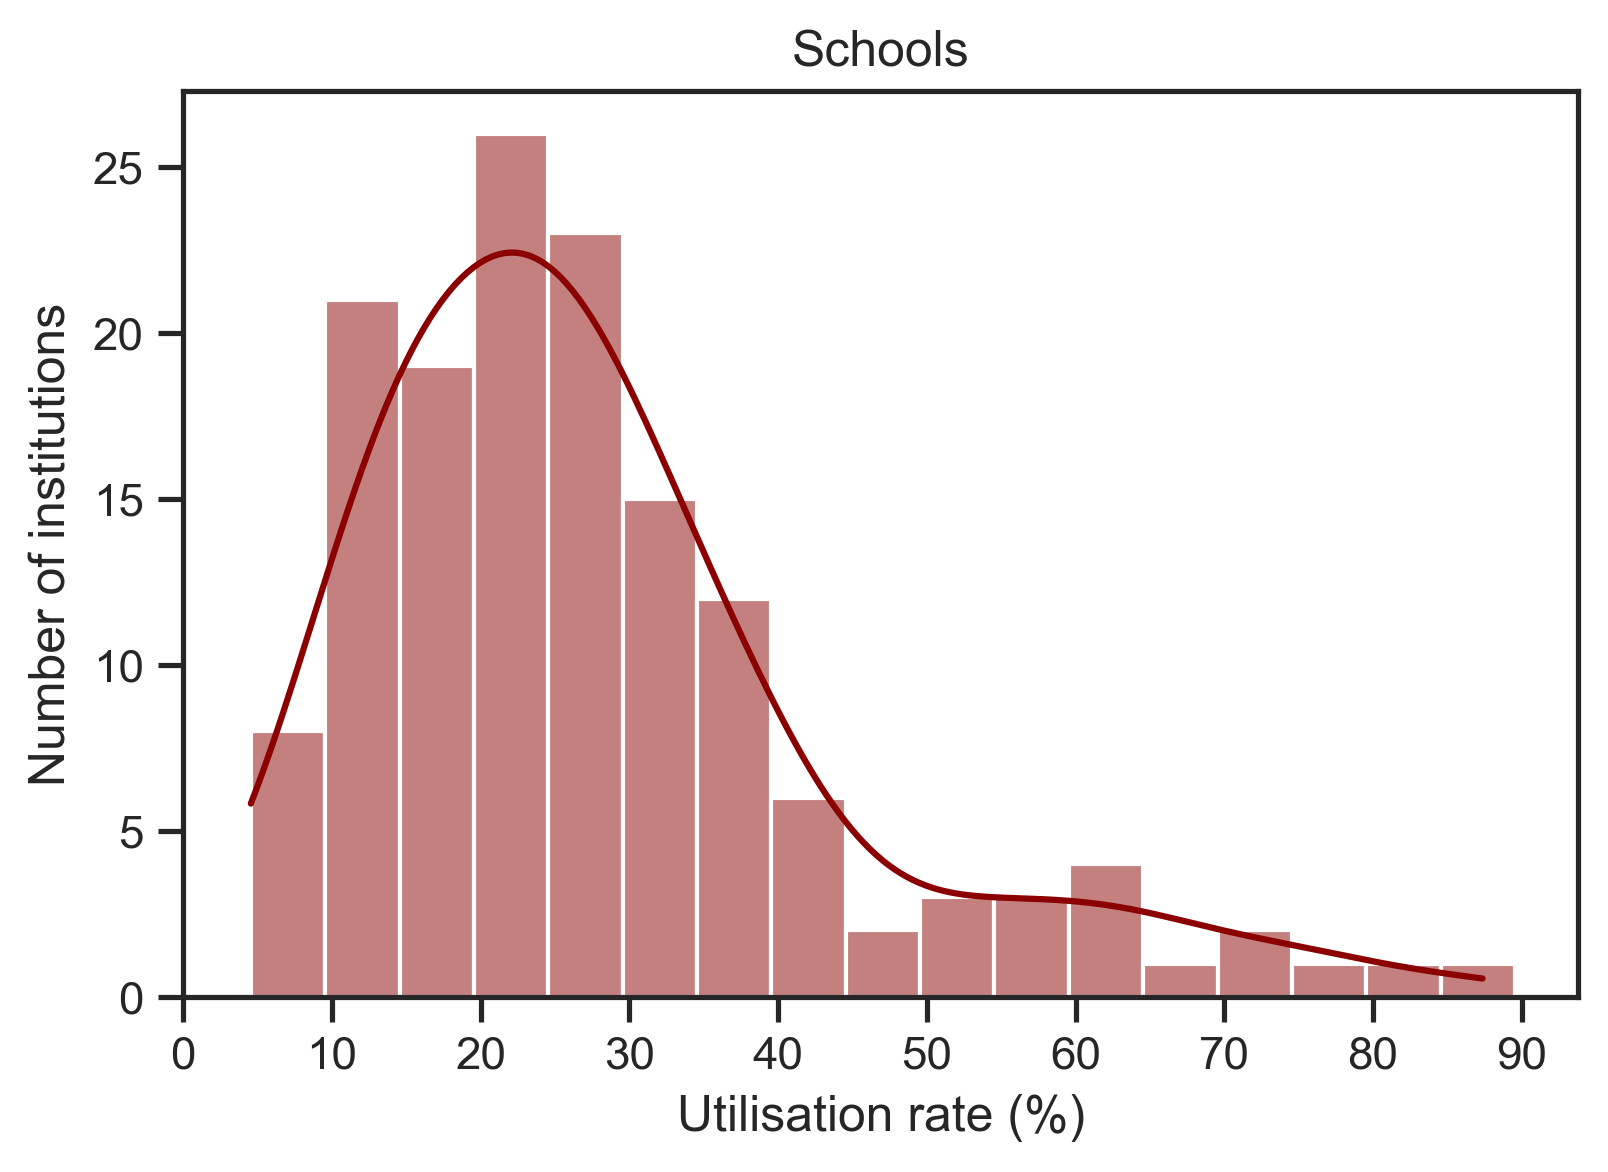

In [26]:
# As above but with kdeplot - THIS IS THE PLOT I'M USING IN PPT FOR NOW
ax=sns.histplot(data=s0_utrate_schools, x="Ut_rate", color="darkred", binwidth=5, kde=True) # 
ax.set_xticks(np.arange(0, 100, 10))  # looks better
ax.set(xlabel= "Utilisation rate (%)", ylabel= "Number of institutions")
ax.set(title="Schools")
plt.show()

In [ ]:
# to save the figure (just add this at the end of the plot)
#plt.savefig("name.png", facecolor="white", transparent=False, dpi=300, bbox_inches="tight")
#plt.show()